In [1]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/linear_regression_class/data_1d.csv

--2024-01-17 21:13:57--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/linear_regression_class/data_1d.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2770 (2.7K) [text/plain]
Saving to: 'data_1d.csv.1'

     0K ..                                                    100%  528K=0.005s

2024-01-17 21:13:57 (528 KB/s) - 'data_1d.csv.1' saved [2770/2770]



In [2]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/linear_regression_class/data_2d.csv

--2024-01-17 21:13:58--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/linear_regression_class/data_2d.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4164 (4.1K) [text/plain]
Saving to: 'data_2d.csv.1'

     0K ....                                                  100% 2.97M=0.001s

2024-01-17 21:13:59 (2.97 MB/s) - 'data_2d.csv.1' saved [4164/4164]



In [3]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/linear_regression_class/data_poly.csv

--2024-01-17 21:13:59--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/linear_regression_class/data_poly.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2778 (2.7K) [text/plain]
Saving to: 'data_poly.csv.1'

     0K ..                                                    100%  421M=0s

2024-01-17 21:14:00 (421 MB/s) - 'data_poly.csv.1' saved [2778/2778]



### Linear Regression

In [4]:
import numpy as np
import matplotlib.pyplot as plt 

In [5]:
# Load the data
X = []
Y = []
with open('data_1d.csv', 'r') as file:
    for line in file:
        x, y = map(float, line.strip().split(','))
        X.append(x)
        Y.append(y)

In [6]:
#let's turn X & Y into numpy arrays
X = np.array(X)
Y = np.array(Y)

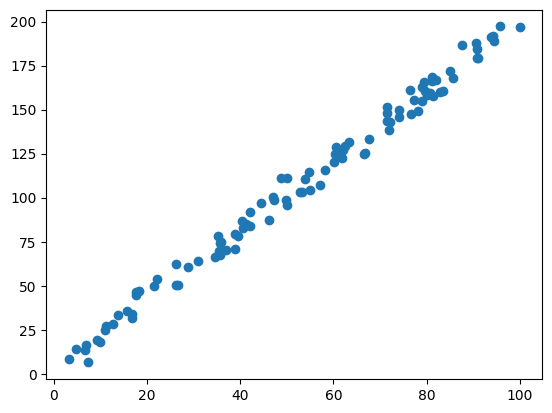

In [7]:
#plot to see what it looks like
plt.scatter(X,Y)
plt.show()

In [8]:
#Apply the Equations we Learned to Calculate a & b
denominator = X.dot(X) - X.mean()*X.sum()

In [9]:
a = (X.dot(Y)- Y.mean()*X.sum() )/denominator
b = (Y.mean()*X.dot(X) - X.mean()*X.dot(Y) )/denominator

In [10]:
#Calculate Predicted Y
Yhat = a*X + b

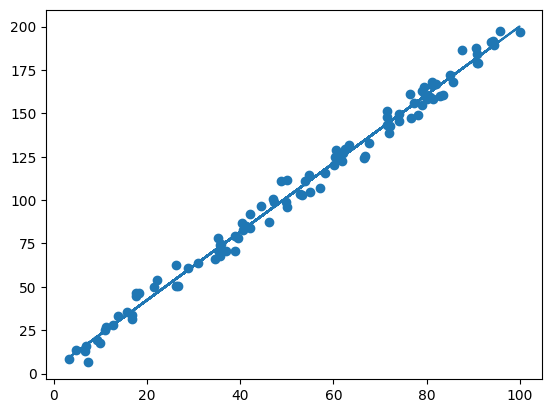

In [11]:
plt.scatter(X,Y)
plt.plot(X,Yhat)
plt.show()

### Verifying The Numerators

In [12]:
Numerator1 = (X.dot(Y)- Y.mean()*X.sum() )
Numerator1

141323.83915644907

In [13]:
Numerator2 = (Y.mean()*X.dot(X) - X.mean()*X.dot(Y) )
Numerator2

205215.91320236772

In [14]:
N = len(X)
N

100

In [15]:
C = 0
for i in range(N):
    C = C + X[i]*Y[i]
C

711409.4979000682

In [16]:
D = sum(X)*sum(Y)
D

57008565.87436195

In [17]:
C*100 - D

14132383.91564487

- Value of `C*100 - D` does match with `Numerator1 = (X.dot(Y)- Y.mean()*X.sum() )`

In [18]:
X2 = [x ** 2 for x in X]
E = sum(Y)*sum(X2)
E

3793667500.28144

In [19]:
F = sum(X)*C
F

3773145908.9611998

In [20]:
E - F

20521591.32024002

- `E - F` Also Matches Exactly with `Numerator2 = (Y.mean()*X.dot(X) - X.mean()*X.dot(Y) )`

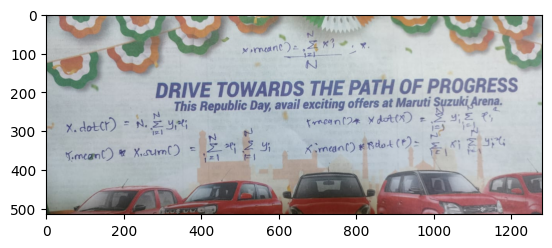

In [21]:
from PIL import Image
im = Image.open('LinearRegression.jpg')
plt.imshow(im);

- After Writing Down the Numerators..
- It is Clearly Visible with Every `Dot()` Product a `*N` Term is Produced
- & with Every `Mean()` Term a `/N` Term is Produced!

### Plotting R^2

In [22]:
#Calculate R-Squared
d1 = Y - Yhat
d2 = Y - Y.mean()

In [23]:
r2 = 1 - d1.dot(d1)/ d2.dot(d2)
r2

0.9911838202977805